### Student Information
Name: SAVADOGO Wendgoundi Abdoul Rasmane

Student ID: 109062859

GitHub ID: wendgoundi

Link: https://github.com/WENDGOUNDI/data_mining/

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

# TAKE HOME EXERCISES

In [80]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [81]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [82]:
X.query('category<3')

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [83]:
X["category_name"].count() 

2257

In [84]:
X.filter(like='category_name')

,category_name
0,comp.graphics
1,comp.graphics
2,soc.religion.christian
3,soc.religion.christian
4,soc.religion.christian
...,...
2252,sci.med
2253,sci.med
2254,sci.med
2255,sci.med


In [85]:
n_by_state = X.groupby("category")["category_name"].count()
n_by_state.head(10)

category
0    480
1    584
2    594
3    599
Name: category_name, dtype: int64

---

In [86]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

dummy_series

text        dummy_record
category               1
dtype: object

In [87]:
result_with_series = X.append(dummy_series, ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [88]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [90]:
X = X.append(dummy_dict, ignore_index=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,2


In [91]:
# drop the record with missing values
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [92]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [93]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [94]:
NA_df['missing_example'].isna()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
isnull() is use to identify or detect missing values in the dataframe. In addition, Python pandas is built on the
top of numpy, therefore values denoted as np.nan are considered as missing values. Here, None is a python None, so
equivalent as np.nan which will be seen as missing” or “not available” or “NA”. isnull() does not consider characters 
such as empty strings '' or numpy.inf as null values.

In [96]:
# Data preprocessing
# Sampling

X_sample = X.sample(n=1000) #random state
X_sample[0:4]

,text,category,category_name
1465,From: REXLEX@fnal.fnal.gov Subject: Re: Assura...,3,soc.religion.christian
1869,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
460,From: ata@hfsi.hfsi.com ( John Ata) Subject: R...,3,soc.religion.christian
1033,From: spl@ivem.ucsd.edu (Steve Lamont) Subject...,1,comp.graphics


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [97]:
X_sample.head()

,text,category,category_name
1465,From: REXLEX@fnal.fnal.gov Subject: Re: Assura...,3,soc.religion.christian
1869,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
460,From: ata@hfsi.hfsi.com ( John Ata) Subject: R...,3,soc.religion.christian
1033,From: spl@ivem.ucsd.edu (Steve Lamont) Subject...,1,comp.graphics
1442,Subject: Re: islamic authority over women From...,0,alt.atheism


In [98]:
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


## Answer here
Above, we queried X and X_sample to display their first 5 rows.
According to our query, we noticed that indexes have been randomnized, shuffled, not in order as before. Shuffling is an important
method in data preprocessing to help the network learning well, generalize efficiently.

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

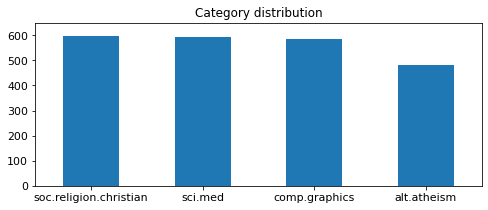

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

## Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

soc.religion.christian    266
comp.graphics             264
sci.med                   262
alt.atheism               208
Name: category_name, dtype: int64


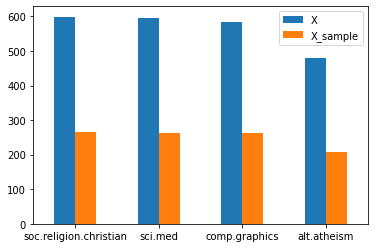

In [102]:
# Answer here
X_sample_val = X_sample.category_name.value_counts()
print(X_sample_val)
X_val = X.category_name.value_counts()

index = ['soc.religion.christian', 'sci.med','comp.graphics', 'alt.atheism',]
df = pd.DataFrame({'X': X_val,
                   'X_sample': X_sample_val}, index=index)
ax = df.plot.bar(rot=0)

In [103]:
import nltk
nltk.download('punkt')

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

X[0:4]["unigrams"]

list(X[0:1]['unigrams'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\302\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [105]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [111]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:30]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]

plot_z = X_counts[0:30, 0:30].toarray()

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

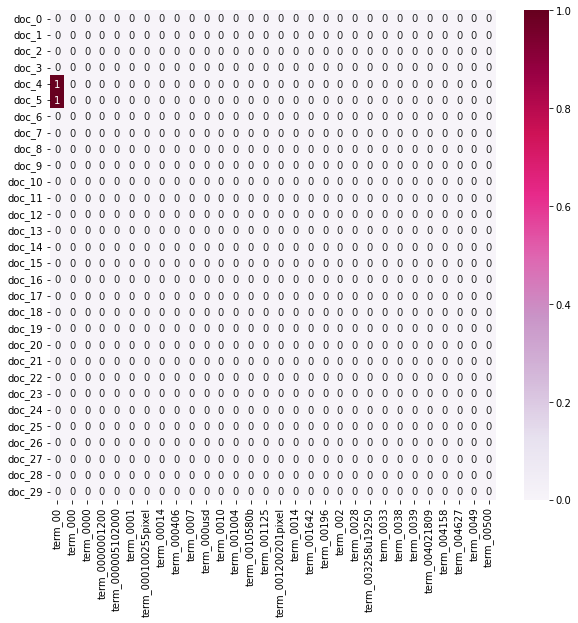

In [112]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset.

In [113]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 2)

## Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

𝐻𝑖𝑛𝑡 : you can refer to Axes3D in the documentation.

### 5.5 Atrribute Transformation / Aggregation

In [115]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [116]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

## Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [117]:
# Answer here
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names()[:300], y = term_frequencies[:300],
            labels=dict(x="count_vect", y="term_frequencies"))
#fig.update_xaxes(type='category')
fig.show()

## Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [118]:
# Answer here

fig_reduce = px.bar(x=count_vect.get_feature_names()[:100], y = term_frequencies[:100],
            labels=dict(x="count_vect", y="term_frequencies"))
#fig.update_xaxes(type='category')
fig_reduce.show()

In [ ]:
Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [119]:
import numpy as np
count_vect.get_feature_names()[:100]
l1 = []
l1 = term_frequencies[:100].tolist()
print(l1)
d = {'count_vect':count_vect.get_feature_names()[:100],'term_frequencies':l1}

new_data = pd.DataFrame(d)
new_data.head()

[134, 92, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 13, 95, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 59, 1, 4, 2, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 2, 1, 2, 2]


,count_vect,term_frequencies
0,00,134
1,000,92
2,0000,1
3,0000001200,2
4,000005102000,1


In [120]:
new_data.sort_values(by=['term_frequencies'], ascending=False)
new_data.head()

,count_vect,term_frequencies
0,00,134
1,000,92
2,0000,1
3,0000001200,2
4,000005102000,1


In [121]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [122]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()

## Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

Answer: Yes it worked. See dataframe below.

In [126]:
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


# NEW DATASET

In [1]:
# Libraries importtaion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import math
from nltk.corpus import stopwords
import os
import csv
from string import punctuation, digits
from collections import Counter
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
py.init_notebook_mode(connected=True)
%matplotlib inline


import nltk
nltk.download('punkt')

# functions
import helpers.data_mining_helpers as dmh



# working with external scripts
%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\302\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Check if all files are available

for dirname, _, filenames in os.walk('E:/code/data_analysis/sentiment labelled sentences'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:/code/data_analysis/sentiment labelled sentences\.DS_Store
E:/code/data_analysis/sentiment labelled sentences\amazon_cells_labelled.txt
E:/code/data_analysis/sentiment labelled sentences\imdb_labelled.txt
E:/code/data_analysis/sentiment labelled sentences\readme.txt
E:/code/data_analysis/sentiment labelled sentences\yelp_labelled.txt


In [3]:
#Import each data (IMBD, Amazon, Yelp)

df_imdb = pd.read_csv("E:/code/data_analysis/sentiment labelled sentences/imdb_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Review', 'sentiment'])

df_amazon = pd.read_csv("E:/code/data_analysis/sentiment labelled sentences/amazon_cells_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Review', 'sentiment'])

df_yelp = pd.read_csv("E:/code/data_analysis/sentiment labelled sentences/yelp_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['Review', 'sentiment'])

In [4]:
# Display the imdb dataframe
df_imdb

,Review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [5]:
# Display the amazon dataframe
df_amazon

,Review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [6]:
# Display the yelp dataframe
df_yelp

,Review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
#Clean and display the dataset
df_concat = [df_imdb, df_amazon, df_yelp]
data = pd.concat(df_concat)

data = data.replace(['$', '#', '!', '@', '\?', '<', '>', '\*', '\\\\' '\{', '\}', '\[', '\]', '\(', '\)', ':', ';', '"', '\. ', ', ', "' ", " '"], 
                '', regex=True)

data

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,The whole experience was underwhelmingand I th...,0


In [8]:
#Reset the indexes
data.reset_index(drop='True',inplace=True)
data

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,The whole experience was underwhelmingand I th...,0


In [9]:
#Copy the original data to the variable data_sample for futher use
data_sample = data.copy()

In [10]:
# Display data info, shapes, columns.
# Describe the data

print("Data frame shape: ",data.shape,"\n")
print("******************************************************************")
print("Data frame columns: ",data.columns,"\n")
print("******************************************************************")
print("Data frame description: ",data.describe(),"\n")
print("******************************************************************")
print("Data frame info: ",data.info(),"\n")

Data frame shape:  (2748, 2) 

******************************************************************
Data frame columns:  Index(['Review', 'sentiment'], dtype='object') 

******************************************************************
Data frame description:           sentiment
count  2748.000000
mean      0.504367
std       0.500072
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000 

******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2748 non-null   object
 1   sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB
Data frame info:  None 



In [11]:
# Show the data mean, standard deviation, minimum and maximum

mean_std_min_max = data['Review'].str.len()

print("Mean:",mean_std_min_max.mean(),"\n")
print("******************************************************************")
print("Standar Deviation:", mean_std_min_max.std(),"\n")
print("******************************************************************")
print("Minimum:", mean_std_min_max.min(),"\n")
print("******************************************************************")
print("Maximun:",mean_std_min_max.max(),"\n")

Mean: 69.51673944687045 

******************************************************************
Standar Deviation: 192.59220554689475 

******************************************************************
Minimum: 6 

******************************************************************
Maximun: 7555 



## Make Queries

In [12]:
# Get rows with negative comments
data.loc[data['sentiment'] == 0]

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
5,The rest of the movie lacks artcharmmeaning..I...,0
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,The whole experience was underwhelmingand I th...,0


In [13]:
# Get rows with positive comments
data.loc[data['sentiment'] == 1]

,Review,sentiment
4,The best scene in the movie was when Gerardo i...,1
7,Saw the movie today and thought it was a good ...,1
9,Loved the casting of Jimmy Buffet as the scien...,1
10,And those baby owls were adorable,1
11,The movie showed a lot of Florida at it's best...,1
...,...,...
2647,Overalla great experience.,1
2649,Their regular toasted bread was equally satisf...,1
2655,The chips and sals a here is amazing,1
2657,This is my new fav Vegas buffet spot.,1


In [14]:
# Count the number of positive and negative sentiments

data['sentiment'].value_counts()

1    1386
0    1362
Name: sentiment, dtype: int64

In [15]:
# Check if any value is missing
data.isnull().values.any()

False

In [16]:
#Checking the sum of missing values
data.isnull().sum().sum()

0

In [17]:
data[0:10][["Review","sentiment"]]

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1
5,The rest of the movie lacks artcharmmeaning..I...,0
6,Wasted two hours,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable,0
9,Loved the casting of Jimmy Buffet as the scien...,1


## Data Visualization

C:\Users\302\anaconda3\envs\pytorchenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



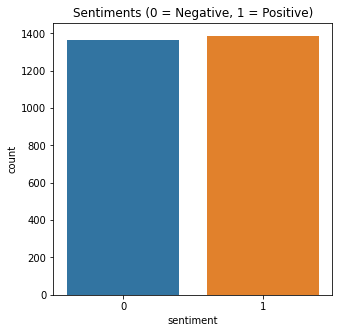

In [18]:
# Visualize the distribution of the data.
# The ploted histogram shows we have a balanced dataset

f, ax = plt.subplots(figsize=(5, 5))
viz1 = sns.countplot(data['sentiment']).set_title('Sentiments (0 = Negative, 1 = Positive)')
plt.show()

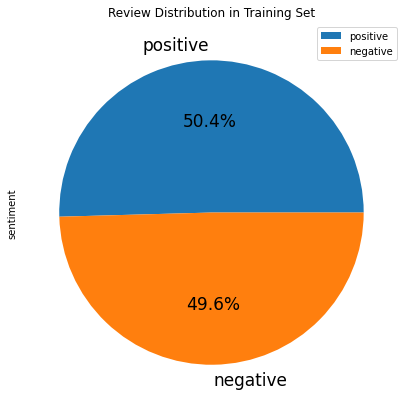

In [19]:
# Visualize the distribution of the data by using pie plot.

data['sentiment'].value_counts().plot(kind='pie', legend=True, labels=['positive', 'negative'], autopct='%1.1f%%', fontsize=17, figsize=[7,7])
plt.title('Review Distribution in Training Set')
plt.show()

In [20]:
# build a histogram with the distribution of the length of the reviews.


viz2 = [go.Histogram(x=mean_std_min_max, xbins=dict(start=0, end=8000, size=50), marker=dict(color='#8c42f4'))]
layout = go.Layout(
                  title='Reviews distribution length',                  
                  xaxis=dict(title='Length'),
                  yaxis=dict(title='Count'),
                  bargap=0.1)
fig = go.Figure(data=viz2, layout=layout)
py.iplot(fig, filename='length histogram')

In [21]:
#Checking if there is any correlation between the review length and the sentiment label

data_sample['senLen'] = data_sample['Review'].apply(lambda x: len(x))
data_test = data_sample.sort_values(by='senLen')
plot = go.Scatter(x = data_test['senLen'], y = data_test['sentiment'], mode='markers')
lyt = go.Layout(title="Review Length vs. Sentiment Label", xaxis=dict(title='Review Length'),yaxis=dict(title='Label'))
fig = go.Figure(data=[plot], layout=lyt)
py.iplot(fig)

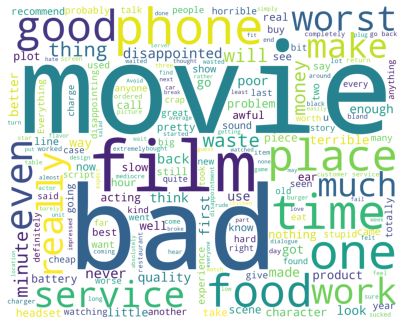

In [79]:
# Let's build a wordcloud with negative reviews

df_pos = data_sample[ data_sample['sentiment'] == 1]
df_pos = df_pos['Review']
df_neg = data_sample[ data_sample['sentiment'] == 0]
df_neg = df_neg['Review']
wordcloud_neg = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(7, 7))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()


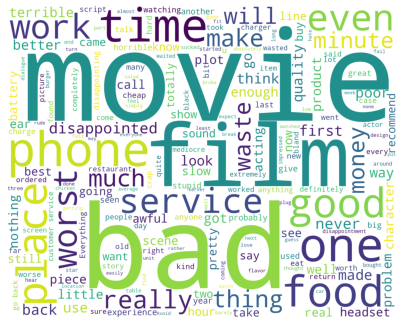

In [78]:
# Let's build a wordcloud with positive reviews

wordcloud_pos = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(7, 7))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

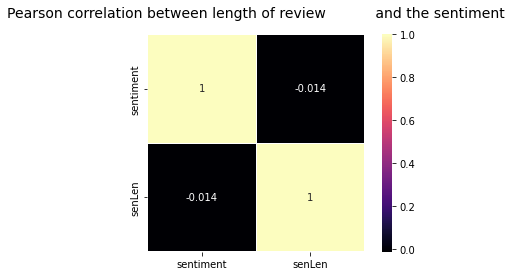

In [22]:
colormap = plt.cm.magma
plt.title('Pearson correlation between length of review\
           and the sentiment', y=1.05, size=14)
sns.heatmap(data_test.drop(['Review'], axis=1).astype(float).corr(),
            linewidths=0.01,
            vmax=1.0,
            square=True,
            cmap=colormap,
            linecolor='white',
            annot=True)
plt.show()

## Binarization

In [23]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(data_sample.sentiment)
print("Classes are:",mlb.classes_)

#Create a column named "bin_sentiment" to store sentiment binarization
data_sample['bin_sentiment'] = mlb.transform(data_sample['sentiment']).tolist()
data_sample

Classes are: [0 1]


,Review,sentiment,senLen,bin_sentiment
0,A veryveryvery slow-movingaimless movie about ...,0,77,[0]
1,Not sure who was more lost - the flat characte...,0,95,[0]
2,Attempting artiness with black & white and cle...,0,184,[0]
3,Very little music or anything to speak of,0,42,[0]
4,The best scene in the movie was when Gerardo i...,1,106,[1]
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,66,[0]
2744,Appetite instantly gone.,0,24,[0]
2745,Overall I was not impressed and would not go b...,0,50,[0]
2746,The whole experience was underwhelmingand I th...,0,89,[0]


## Unigrames

In [24]:
# Define unigrams
data_sample['unigrams'] = data_sample['Review'].apply(lambda x: dmh.tokenize_text(x))

#Display the first four data with unigrams
data_sample[0:4]

,Review,sentiment,senLen,bin_sentiment,unigrams
0,A veryveryvery slow-movingaimless movie about ...,0,77,[0],"[A, veryveryvery, slow-movingaimless, movie, a..."
1,Not sure who was more lost - the flat characte...,0,95,[0],"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,184,[0],"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of,0,42,[0],"[Very, little, music, or, anything, to, speak,..."


In [25]:
## Feature Subset Selection
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data_sample.Review)

analyze = count_vect.build_analyzer()
analyze("this product is the best")

print("Shape is:",X_counts.shape,'\n')

print(count_vect.get_feature_names()[0:10])

Shape is: (2748, 6011) 

['00', '10', '100', '10simply', '11', '12', '12ridiculous', '13', '15', '15gand']


In [26]:
# Conversion from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [27]:
# Check the conversion
count_vect.transform(['Result of conversion from sparse array to normal array']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_10simply',
 'term_11',
 'term_12',
 'term_12ridiculous',
 'term_13',
 'term_15',
 'term_15gand',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949as',
 'term_1971',
 'term_1973when']

In [29]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data_sample.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [30]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

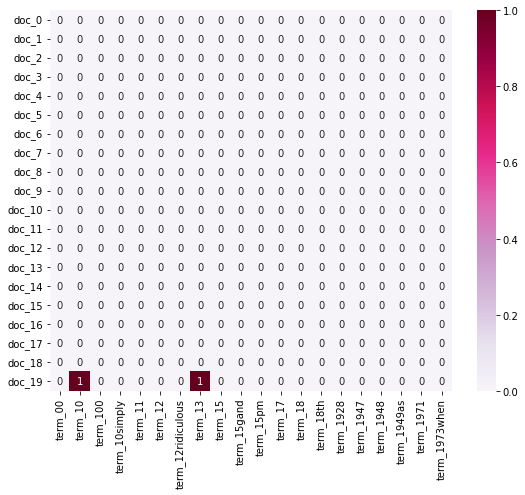

In [31]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Dimentionality Reduction

In [32]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2748, 2)

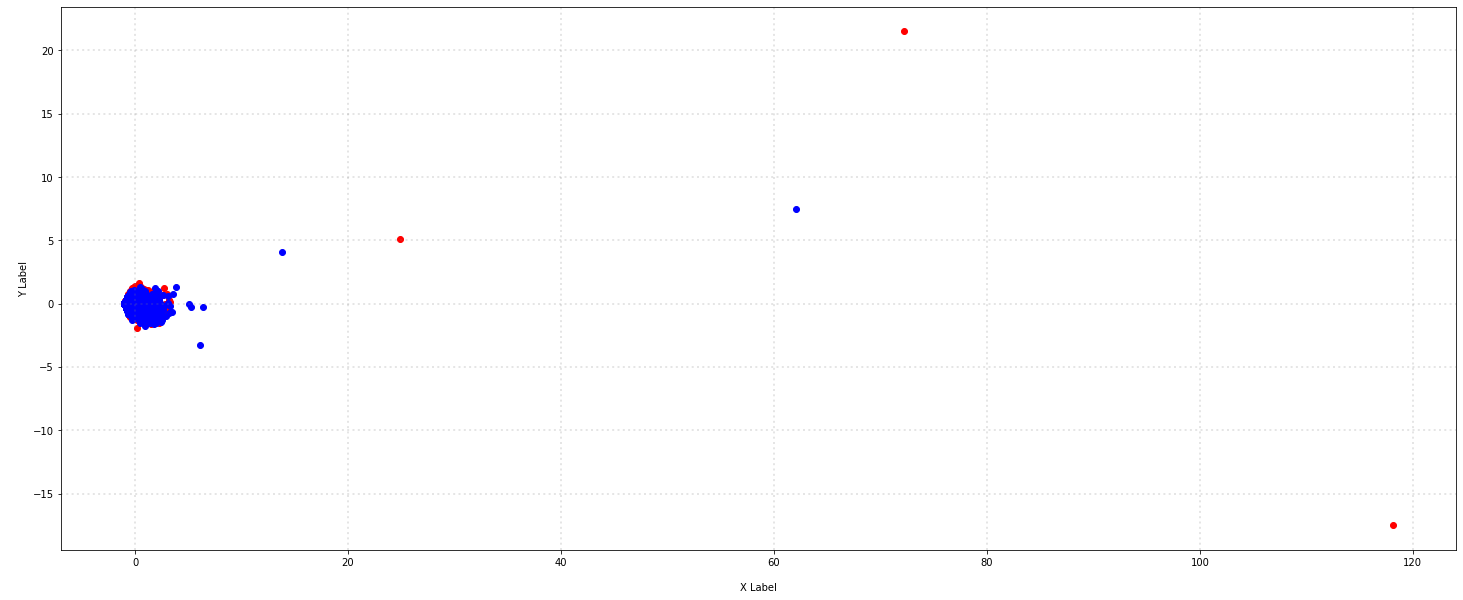

In [33]:
categories = [0, 1,]

col = ['red', 'blue',]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[data_sample['sentiment'] == category].T[0]
    ys = X_reduced[data_sample['sentiment'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## Attribute Transformation and Aggregation

In [34]:
# compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [35]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]

1

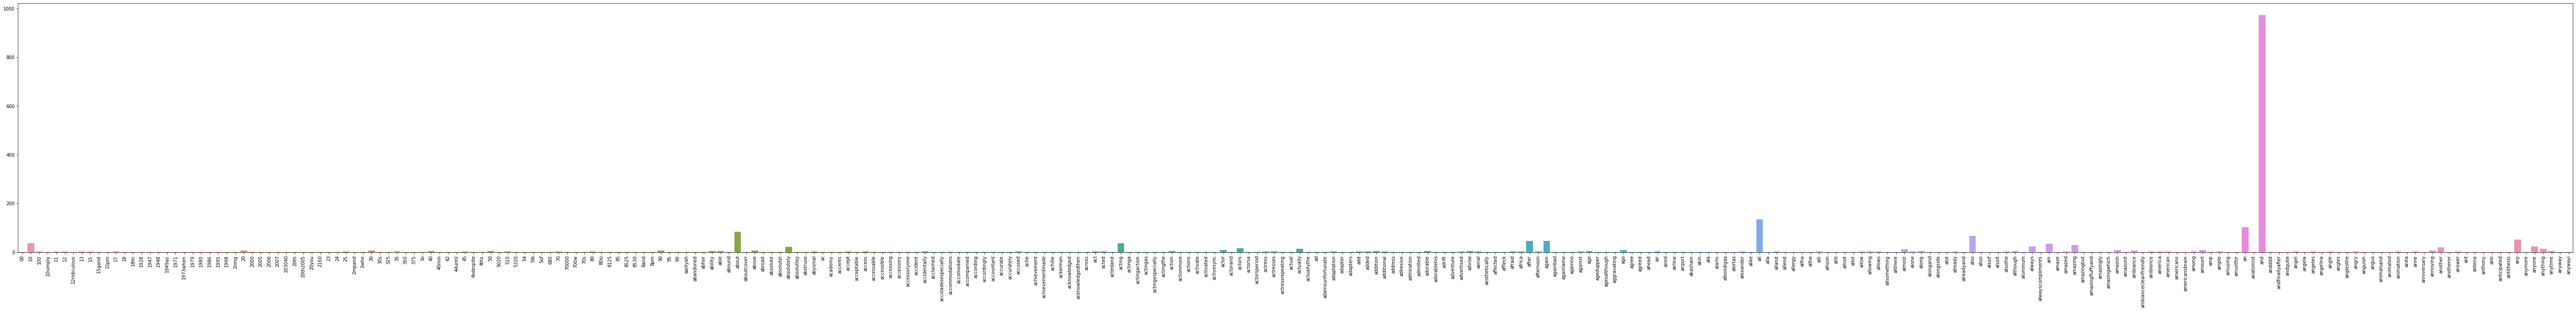

In [36]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [38]:
import plotly.express as px

fig_reduce = px.bar(x=count_vect.get_feature_names()[:100], y = term_frequencies[:100],
            labels=dict(x="count_vect", y="term_frequencies"))
#fig.update_xaxes(type='category')
fig_reduce.show()

In [39]:

count_vect.get_feature_names()[:100]
l1 = []
l1 = term_frequencies[:100].tolist()
print(l1)
d = {'count_vect':count_vect.get_feature_names()[:100],'term_frequencies':l1}

new_data = pd.DataFrame(d)
new_data.head()

[1, 37, 3, 1, 2, 3, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 5, 4, 1, 83, 1, 7, 1, 1, 1, 21, 1, 1, 2, 1, 1, 1, 2, 1, 2]


,count_vect,term_frequencies
0,00,1
1,10,37
2,100,3
3,10simply,1
4,11,2


In [40]:
new_data.sort_values(by=['term_frequencies'], ascending=False)
new_data.head()

,count_vect,term_frequencies
0,00,1
1,10,37
2,100,3
3,10simply,1
4,11,2


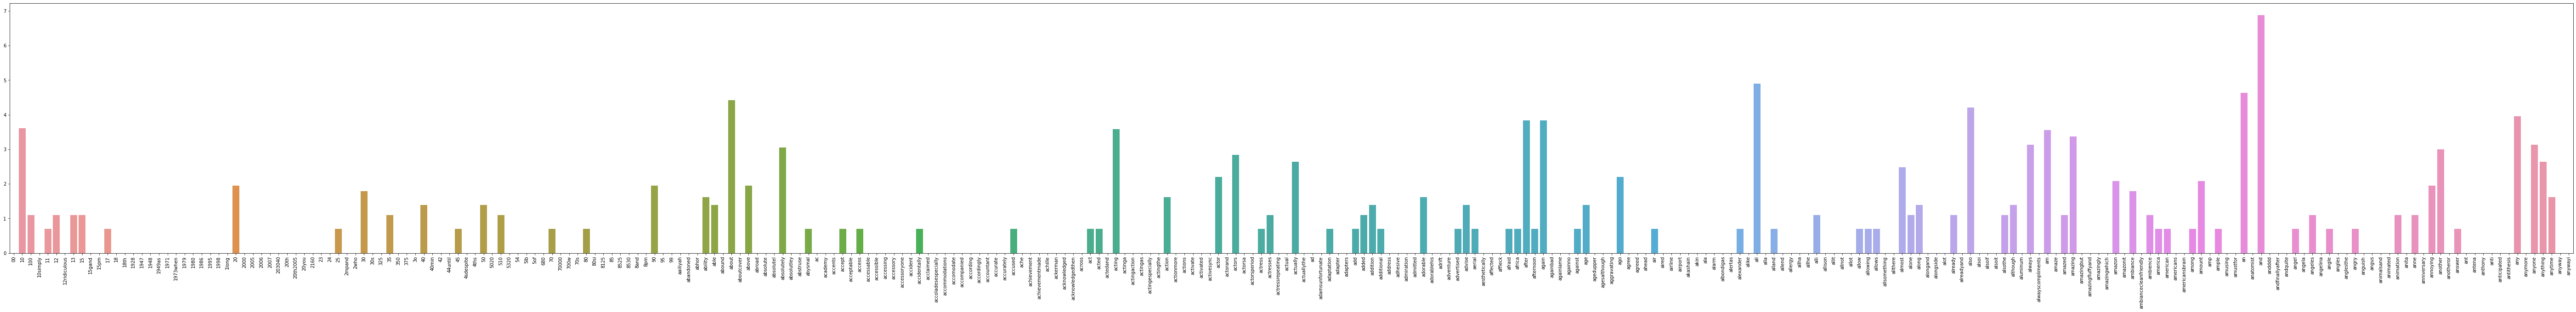

In [41]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## Data Exploration

In [42]:
# We retrieve sentences for a random record        #different from the homework
# generate random integer values
from numpy.random import seed
from numpy.random import randint
from numpy import random
values = random.randint(1,10)
      
document_to_transform = []
random_record = data_sample.iloc[values]
random_record = random_record['Review']
document_to_transform.append(random_record)
document_to_transform

["The rest of the movie lacks artcharmmeaning..If it's about emptinessit works I guess because it's empty "]

In [43]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count = count_vect.transform(document_to_transform)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count.todense())


Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]


## Distribution of the length of the reviews under each sentiment class

In [44]:
#Create a new dataframe for the distribution
df_distribution = data_sample.drop(['senLen','bin_sentiment','unigrams'],axis=1)

df_distribution.head()

,Review,sentiment
0,A veryveryvery slow-movingaimless movie about ...,0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1


In [45]:
# Create a new column to store the phrase length
df_distribution['phrase_len'] = [len(t) for t in df_distribution.Review]
df_distribution.head(4)

,Review,sentiment,phrase_len
0,A veryveryvery slow-movingaimless movie about ...,0,77
1,Not sure who was more lost - the flat characte...,0,95
2,Attempting artiness with black & white and cle...,0,184
3,Very little music or anything to speak of,0,42


<function matplotlib.pyplot.show(close=None, block=None)>

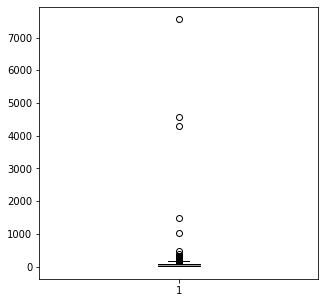

In [46]:
# Visualize the distribution

fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(df_distribution.phrase_len)
plt.show

In [47]:
 # Let's make a quick query to display reviews with at least 100 of phrase length
df_distribution[df_distribution.phrase_len > 100].head()

,Review,sentiment,phrase_len
2,Attempting artiness with black & white and cle...,0,184
4,The best scene in the movie was when Gerardo i...,1,106
5,The rest of the movie lacks artcharmmeaning..I...,0,104
16,This review is long overduesince I consider A ...,1,107
17,I'll put this gem up against any movie in term...,1,147


### Here we will focus on the extraction of negative and positive review and visualize results based on them

In [48]:
# From our dataframe, we will extract negative reviews

neg_phrases = df_distribution[df_distribution.sentiment == 0]
neg_words = []
for t in neg_phrases.Review:
    neg_words.append(t)
neg_words[5:8]

neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[107:205]

'the flat characters or the audiencenearly half of whom walked out  Attempting artiness with black '

In [49]:
# From our dataframe, we will extract positive reviews

pos_phrases = df_distribution[df_distribution.sentiment == 1] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.Review:
    pos_string.append(t)
    
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:107]

'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head  '

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(df_distribution.Review)
len(cvector.get_feature_names())

26324

In [51]:
neg_matrix = cvector.transform(df_distribution[df_distribution.sentiment == 0].Review)
pos_matrix = cvector.transform(df_distribution[df_distribution.sentiment == 1].Review)

In [52]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])
neg_tf.head()

,Terms,negative
0,the,943
1,and,397
2,it,387
3,to,379
4,is,352


In [53]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
the,943
and,397
it,387
to,379
is,352


In [54]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

,positive
Terms,
the,927
and,576
is,385
it,334
this,302


In [55]:
# After above manipulation to extract negative and positive reviews, let's concatenate them in one dataframe

term_freq_df = pd.concat([neg_tf_df,pos_words_tf_df],axis=1)
term_freq_df['total'] = term_freq_df['negative'] +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(10)

,negative,positive,total
the,943,927,1870
and,397,576,973
is,352,385,737
it,387,334,721
to,379,285,664
of,333,286,619
this,303,302,605
was,319,248,567
in,196,197,393
for,180,146,326


Text(0.5, 1.0, 'Top 300 reviews based on frequency')

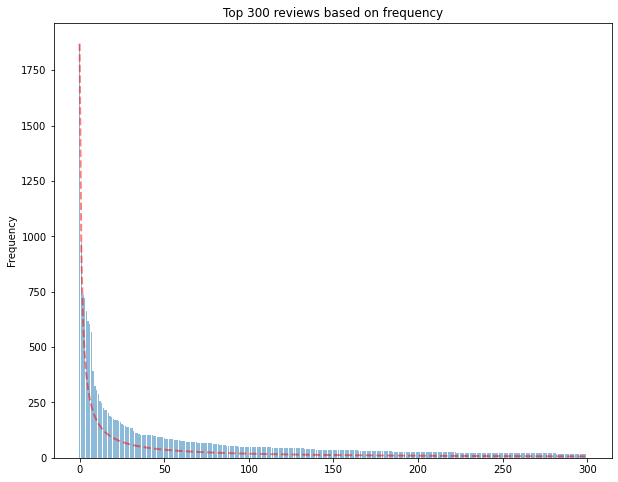

In [56]:
y_pos = np.arange(300)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 reviews based on frequency')

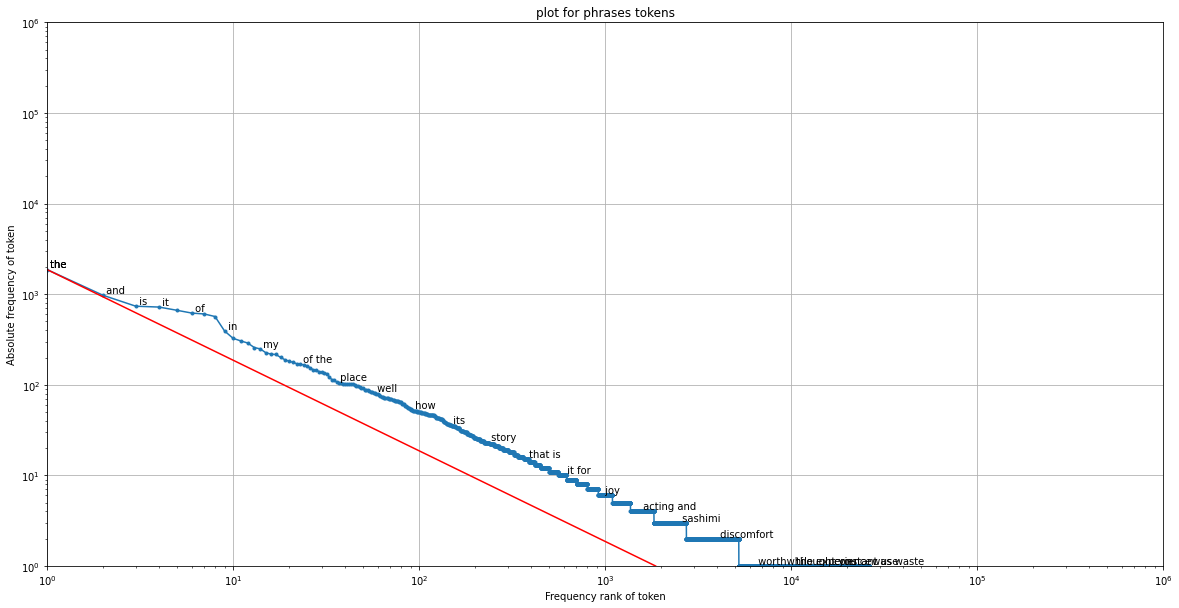

In [57]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(20,10))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5, 1.0, 'Top 50 tokens in negative reviews')

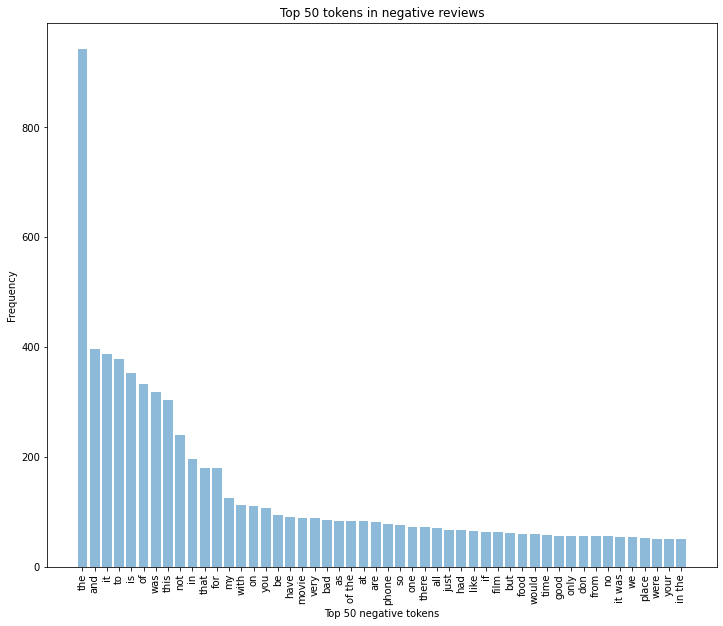

In [58]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative reviews')

Text(0.5, 1.0, 'Top 50 tokens in positive reviews')

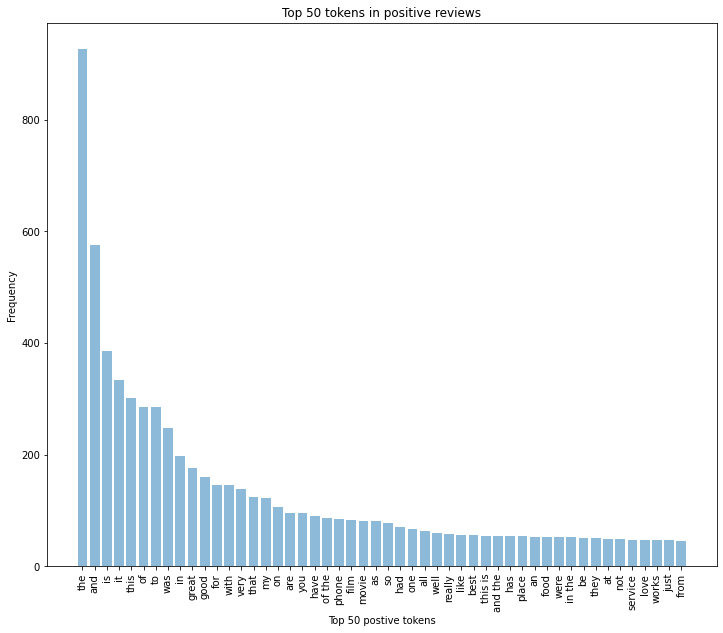

In [59]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 postive tokens')
plt.title('Top 50 tokens in positive reviews')

## BUILD NAIVE-BAYES CLASSIFICATION

### TF-IDF

In [60]:
X = data_sample['Review']
y = data_sample['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [61]:
#Converting the texts to vectors 
vector = TfidfVectorizer()
training_term = vector.fit_transform(X_train)
testing_term = vector.transform(X_test)

vector.get_feature_names()[:5]

['00', '10', '100', '10simply', '11']

In [63]:
model_naive_bayes = MultinomialNB()
model_naive_bayes.fit(training_term, y_train)
predictions_train = model_naive_bayes.predict(training_term)
predictions_test = model_naive_bayes.predict(testing_term)
print('Naive_Bayes TF-IDF Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Naive_Bayes TF-IDF Test Accuracy:', accuracy_score(y_test, predictions_test))

Naive_Bayes TF-IDF Train Accuracy: 0.9567327133036797
Naive_Bayes TF-IDF Test Accuracy: 0.8


Confusion matrix, without normalization
[[1184   42]
 [  65 1182]]
Confusion matrix, without normalization
[[106  30]
 [ 25 114]]


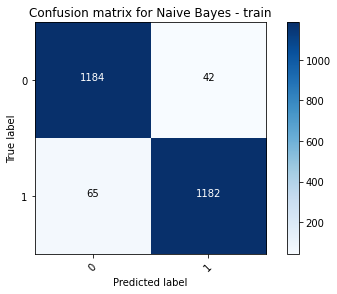

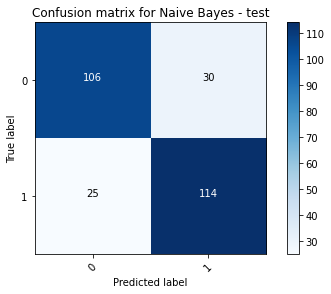

In [64]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix_train = confusion_matrix(y_train, predictions_train)
cnf_matrix_test = confusion_matrix(y_test, predictions_test)
plt.figure()
plot_confusion_matrix(cnf_matrix_train,
                      classes=[0,1],
                      title='Confusion matrix for Naive Bayes - train')
plt.figure()
plot_confusion_matrix(cnf_matrix_test,
                      classes=[0,1],
                      title='Confusion matrix for Naive Bayes - test')

In [65]:
#Converting the texts to vectors 
#Converting the texts to vectors 
vector_count = CountVectorizer()
train_term_vector_count = vector_count.fit_transform(X_train)
test_term_vector_count = vector_count.transform(X_test)

vector_count.get_feature_names()[:5]

['00', '10', '100', '10simply', '11']

In [66]:
model_naive_bayes_vector_count = MultinomialNB()
model_naive_bayes_vector_count.fit(train_term_vector_count, y_train)

predictions_train_vector_count = model_naive_bayes_vector_count.predict(train_term_vector_count)
predictions_test_vector_count = model_naive_bayes_vector_count.predict(test_term_vector_count)

print('Train Accuracy:', accuracy_score(y_train, predictions_train_vector_count))
print('Test Accuracy:', accuracy_score(y_test, predictions_test_vector_count))

Train Accuracy: 0.9490497371613424
Test Accuracy: 0.8036363636363636


Confusion matrix, without normalization
[[1184   42]
 [  65 1182]]
Confusion matrix, without normalization
[[106  30]
 [ 25 114]]


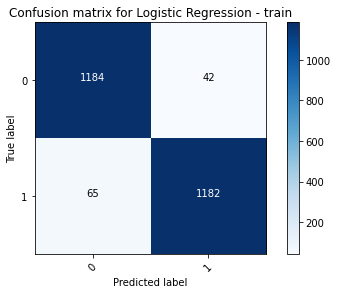

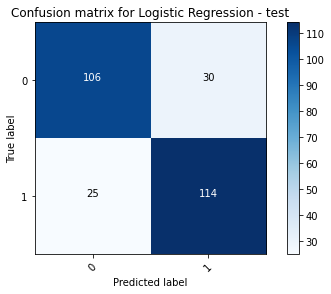

In [67]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix_train = confusion_matrix(y_train, predictions_train)
cnf_matrix_test = confusion_matrix(y_test, predictions_test)
plt.figure()
plot_confusion_matrix(cnf_matrix_train,
                      classes=[0,1],
                      title='Confusion matrix for Logistic Regression - train')
plt.figure()
plot_confusion_matrix(cnf_matrix_test,
                      classes=[0,1],
                      title='Confusion matrix for Logistic Regression - test')

 Regarding the classifier models, we noticed not huge gap betweem. The naive-bayes classifier based TF-IDF obtained 95.67% and 80% respectively as traning and testing accuracy. The naive-bayes classifier based word frequency reached 94.90% as training accuracy and 80.36% as testing accuracy. From the above results we can state that both models are sligthly the same and can be interchangeable. 